EDA_Análise Exploratória de Dados

Etapa 1 - Carregamento do Dataset

In [37]:
import pandas as pd
import numpy as np

In [38]:
url = ("canaisnerds.csv")

In [39]:
df = pd.read_csv("canaisnerds.csv", sep=";")

In [40]:
df = pd.read_csv(url, sep=";")

In [41]:
def converter_inscritos(valor):
    """Converte strings de K e M para números inteiros (float)."""
    if pd.isna(valor): return 0
    valor = str(valor).upper().replace(',', '.')
    
    if 'M' in valor:
        # Multiplica por 1.000.000
        return float(valor.replace('M', '')) * 1_000_000
    if 'K' in valor:
        # Multiplica por 1.000
        return float(valor.replace('K', '')) * 1_000
    try:
        return float(valor)
    except ValueError:
        return 0

Etapa 2 - Limpeza dos Dados (Retirar a coluna Endereço do canal (por ser uma url e não trazer benefício))

In [42]:
df_dropar_coluna_url = df.drop(columns=['endereço'])

In [43]:
# 4. Remover a coluna de texto original
df_dropar_coluna_url['qtde_inscritos_num'] = df_dropar_coluna_url['qtde_inscritos (aprox.)'].apply(converter_inscritos)

In [44]:
# Visualizar o resultado
print("DataFrame Simplificado e Limpo:")
print(df_dropar_coluna_url.head())
print("\nTipos de Dados:")
print(df_dropar_coluna_url.info())

DataFrame Simplificado e Limpo:
              canal                                          descrição  \
0  Pipoca e Nanquim  Conteúdo sobre HQs, quadrinhos, livros e cultu...   
1     Coisa de Nerd  Vídeos de curiosidades, ciência, desafios e re...   
2          Naruhodo  Podcast com a missão de usar a ciência para ex...   
3          GugaCast  Canal do podcast GugaCast, focado em entrevist...   
4       Peixe Babel  Curiosidades sobre zoologia, biologia, e o mun...   

                     categoria qtde_inscritos (aprox.)  conhece_canal  \
0       Quadrinhos/Cultura Pop                   1.81M              0   
1  Curiosidades/Entretenimento                   2.55M              0   
2         Ciência/Curiosidades                    441K              0   
3            Podcast/Histórias                     60K              0   
4             Ciência/Biologia                    412K              0   

   qtde_inscritos_num  
0           1810000.0  
1           2550000.0  
2           

Etapa 3 - Definir as colunas X e Y para mostrar qual o canal tem mais inscritos

In [45]:
# X é a coluna 'canal' e Y é a coluna 'qtde_inscritos_num'
coluna_x = 'canal'
coluna_y = 'qtde_inscritos_num'

In [47]:
df_sorted = df_dropar_coluna_url.sort_values(by=coluna_y, ascending=False)

In [48]:
df_sorted.head()

,canal,descrição,categoria,qtde_inscritos (aprox.),conhece_canal,qtde_inscritos_num
14,Manual do Mundo,"Experiências, curiosidades e tutoriais de ""Faç...",Curiosidades/Faça Você Mesmo,19.8M,0,19800000.0
5,Ciência Toda Dia,Canal totalmente voltado para assuntos que pod...,Ciência/Curiosidades,7.49M,0,7490000.0
19,Jovem Nerd,"Canal de cultura pop, games, filmes, séries, q...",Cultura Pop/Entretenimento,3.5M,0,3500000.0
1,Coisa de Nerd,"Vídeos de curiosidades, ciência, desafios e re...",Curiosidades/Entretenimento,2.55M,0,2550000.0
0,Pipoca e Nanquim,"Conteúdo sobre HQs, quadrinhos, livros e cultu...",Quadrinhos/Cultura Pop,1.81M,0,1810000.0


Etapa 4 - Criar um Gráfico MatplotLib de Barras
Os dados X e Y, Legenda X e uma Legenda Y e um Título

In [ ]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Canal')

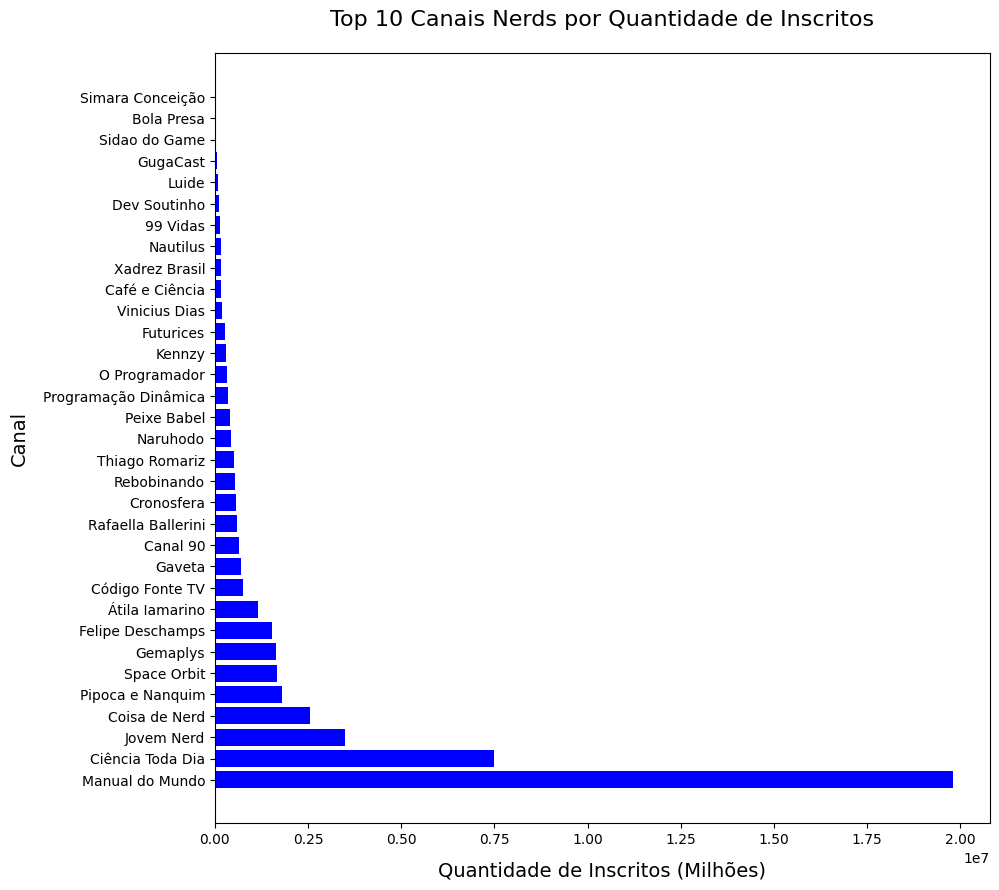

In [52]:
# df_sorted.plot(df_sorted['canal'],df_sorted['qtde_inscritos_num'],kind='barh', figsize=(14, 10), color='green')
from matplotlib import ticker


plt.figure(figsize=(10,10)) # Aumente o tamanho para mais espaço
plt.barh(df_sorted['canal'], df_sorted['qtde_inscritos_num'], color='blue')
formatter = ticker.FuncFormatter(lambda x, p: format(int(x), ',').replace(',', '.'))
# Título
plt.title('Top 10 Canais Nerds por Quantidade de Inscritos', fontsize=16, pad=20)

# Legenda X (Eixo Horizontal - Valores)
plt.xlabel('Quantidade de Inscritos (Milhões)', fontsize=14, labelpad=10)

# Legenda Y (Eixo Vertical - Categorias)
plt.ylabel('Canal', fontsize=14, labelpad=10)